# Investigation of the proper masking technique - patterns at the edges

In [46]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()
tmask = 1 - mesh.tmask[0]

# Open the dataset
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/20mar22/SalishSea_1d_20220320_20220320_grid_T.nc')
temp = ds.votemper
e3t = ds.e3t


In [48]:
mesh

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [49]:
temp2 = temp.where(mask==1)
e3t = e3t.where(mask==1)
temp3 = temp.where(mask[0,0]==1)
temp4 = np.ma.masked_array(temp[0], mask=tmask)
temp5 = temp[0,0:27].where(mask[0,0:27]==1)

In [50]:
print(temp2.shape)
print(temp3.shape)
print(temp4.shape)
print(temp5.shape)

(1, 40, 898, 398)
(1, 40, 898, 398)
(40, 898, 398)
(27, 898, 398)


In [51]:
print(np.array_equal(temp2[0,0], temp3[0,0], equal_nan=True))
print(np.array_equal(temp2[0,1], temp3[0,1], equal_nan=True))
print(np.array_equal(mask[0,1], mask[0,1], equal_nan=True))
print(np.array_equal(temp2[0,5], temp3[0,5], equal_nan=True))
print('\n')

print(np.array_equal(temp2[0,0], temp4[0] ,equal_nan=True))
print(np.array_equal(temp2[0,0:27], temp4[0:27] ,equal_nan=True))
print('\n')

print(np.array_equal(temp2[0,0], temp5[0] ,equal_nan=True))
print(np.array_equal(temp2[0,0:27], temp5[0:27] ,equal_nan=True))

True
True
True
False


False
False


True
True


In [52]:
temp4.data.shape

(40, 898, 398)

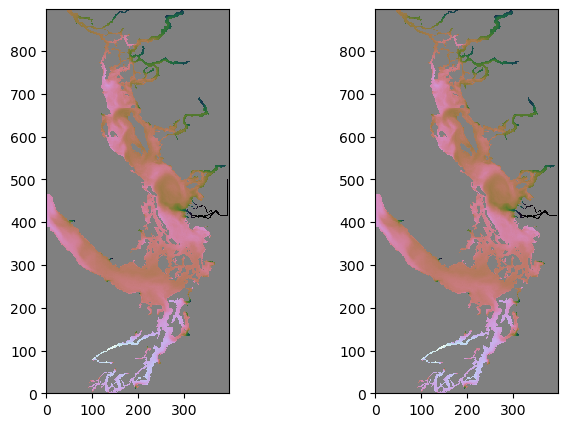

In [53]:
cmap = plt.get_cmap('cubehelix')
cmap.set_bad('gray')

fig, ax = plt.subplots(ncols=2)
ax[0].pcolormesh(temp4[0], cmap = cmap)
ax[1].pcolormesh(temp2[0,0], cmap = cmap)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

In [54]:
# Preparation of the dataarray 
temp41= xr.DataArray(temp4,
                coords = {'deptht': temp.deptht, 'y': temp.y, 'x': temp.x},
                dims = ['deptht','y','x'],
                attrs=dict(description="sea_water_conservative_temperature",
                            long_name ="Conservative Temperature",
                            units="degree_C"),
                )


In [55]:
temp2_i = (temp2[0,0:27] * e3t[0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]
temp4_i = (temp41[0:27] * e3t[0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]

print(np.array_equal(temp2_i, temp4_i ,equal_nan=True))


True


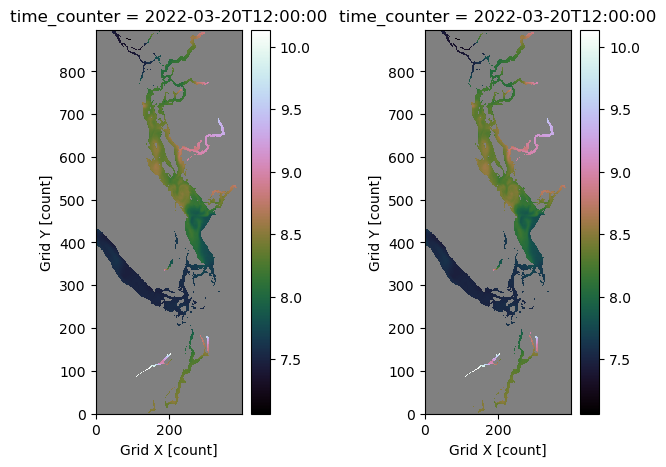

In [56]:
cmap = plt.get_cmap('cubehelix')
cmap.set_bad('gray')

fig, ax = plt.subplots(ncols=2)
temp2_i.plot.pcolormesh(ax=ax[0], cmap = cmap)
temp4_i.plot.pcolormesh(ax=ax[1], cmap = cmap)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

In [60]:
temp.deptht[26]

<xarray.DataArray 'deptht' ()>
array(98.06296, dtype=float32)
Coordinates:
    deptht   float32 98.06
Attributes:
    standard_name:  sea_floor_depth
    long_name:      Sea Floor Depth
    units:          metres
    positive:       down